In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
x1 = np.random.choice([0,1,2,3,4,5,6,7,8,9,10], p=[0.01, 0.01, 0.15, 0.19, 0.05, 0.11, 0.2, 0.16, 0.10, 0.01, 0.01], size=(500))
idxs = np.arange(len(x1))
out = x1.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x1 = out

x2 = np.random.choice([6,7,8,9,10,11,12,13,14,15,16,17], p=[0.01, 0.01, 0.15, 0.23, 0.14, 0.06, 0.05, 0.10, 0.12, 0.11, 0.01, 0.01], size=(500))
idxs = np.arange(len(x2))
out = x2.astype(float)
out.flat[idxs] += np.random.uniform(low=-1, high=1, size=len(idxs))
x2 = out

In [8]:
y1 = np.full(len(x1), 0.80)
idxs = np.arange(len(y1))
out = y1.astype(float)
out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
y1 = out

y2 = np.full(len(x2), 1.80)
idxs = np.arange(len(y2))
out = y2.astype(float)
out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
y2 = out

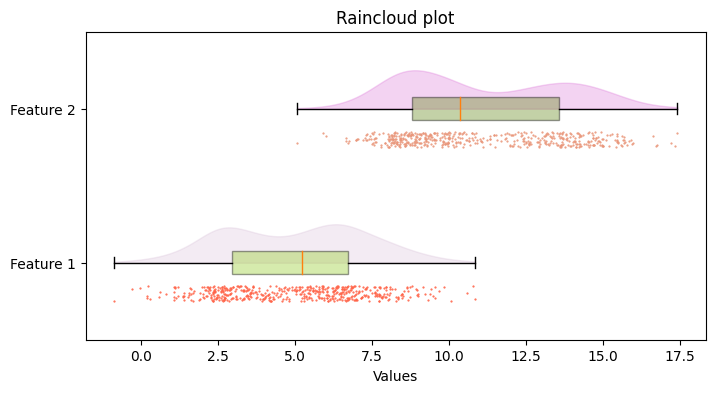

In [35]:
fig, ax = plt.subplots(figsize=(8, 4))

data_x = [x1, x2]

boxplots_colors = ['yellowgreen', 'olivedrab']
bp = ax.boxplot(data_x, patch_artist = True, vert = False)

for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.4)
    
violin_colors = ['thistle', 'orchid']
vp = ax.violinplot(data_x, points=500, 
               showmeans=False, showextrema=False, showmedians=False, vert=False)

for idx, b in enumerate(vp['bodies']):
    # get the center
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # modify the paths to not go further right than the center
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    b.set_color(violin_colors[idx])
    
scatter_colors = ['tomato', 'darksalmon']
for idx, features in enumerate(data_x):
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=.3, c=scatter_colors[idx])

plt.yticks(np.arange(1,3,1), ['Feature 1', 'Feature 2'])  # Set text labels.
plt.xlabel('Values')
plt.title("Raincloud plot")
plt.savefig('raincloud_plot.png', facecolor="white", bbox_inches='tight')
plt.show()